In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")
df


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
133344,2020.0,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
133345,2021.0,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
133346,2020.0,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
133347,2020.0,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [2]:
df.isnull().sum()

work_year             10
experience_level       0
employment_type        0
job_title              0
salary                 0
salary_currency        0
salary_in_usd          0
employee_residence     0
remote_ratio           0
company_location       0
company_size           0
dtype: int64

In [3]:
df["work_year"].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [4]:
df[df.isnull().any(axis=1)]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
5588,NaN,SE,FT,Product Manager,184500,USD,184500,US,0,US,M
59692,NaN,MI,FT,Engineer,110000,USD,110000,DE,0,DE,M
59710,NaN,EN,FT,Data Scientist,208800,USD,208800,US,0,US,M
59759,NaN,SE,FT,Software Engineer,135000,USD,135000,US,0,US,M
59789,NaN,SE,FT,Engineer,112000,USD,112000,US,0,US,M
131000,NaN,SE,FT,Machine Learning Engineer,163800,USD,163800,US,0,US,M
131006,NaN,SE,FT,Data Analytics Manager,204500,USD,204500,US,0,US,M
133054,NaN,EN,FT,Data Scientist,40000,USD,40000,JP,100,MY,L
133281,NaN,MI,FT,Machine Learning Engineer,180000,PLN,46597,PL,100,PL,L
133317,NaN,MI,FT,Data Scientist,130000,USD,130000,US,50,US,L


In [5]:
#media de salários
df_salaries = pd.DataFrame({
    'nome': ['Guilherme', 'Eduardo', 'João', 'Maria','Val'],
    'salario': [1000, np.nan, 2000, np.nan, 100000]})
df_salaries['salario_media'] = df_salaries['salario'].fillna(df_salaries['salario'].mean().round(2))

df_salaries



,nome,salario,salario_media
0,Guilherme,1000.0,1000.00
1,Eduardo,NaN,34333.33
2,João,2000.0,2000.00
3,Maria,NaN,34333.33
4,Val,100000.0,100000.00


In [6]:
#Mediana 
df_salaries['salario_mediana'] = df_salaries['salario'].fillna(df_salaries['salario'].median().round(2))
df_salaries

,nome,salario,salario_media,salario_mediana
0,Guilherme,1000.0,1000.00,1000.0
1,Eduardo,NaN,34333.33,2000.0
2,João,2000.0,2000.00,2000.0
3,Maria,NaN,34333.33,2000.0
4,Val,100000.0,100000.00,100000.0


In [7]:
#Foward Fill

df_temperature = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [22, np.nan, np.nan, 25, 26]})

df_temperature['Preenchido_Ffill'] = df_temperature["Temperatura"].fillna(method='ffill')
df_temperature

C:\Users\eduar\AppData\Local\Temp\ipykernel_39804\1902056240.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_temperature['Preenchido_Ffill'] = df_temperature["Temperatura"].fillna(method='ffill')


,Dia,Temperatura,Preenchido_Ffill
0,Segunda,22.0,22.0
1,Terça,NaN,22.0
2,Quarta,NaN,22.0
3,Quinta,25.0,25.0
4,Sexta,26.0,26.0


In [8]:
#Backward Fill

df_temperature['Preenchido_Bfill'] = df_temperature["Temperatura"].fillna(method='bfill')
df_temperature

C:\Users\eduar\AppData\Local\Temp\ipykernel_39804\2409064940.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_temperature['Preenchido_Bfill'] = df_temperature["Temperatura"].fillna(method='bfill')


,Dia,Temperatura,Preenchido_Ffill,Preenchido_Bfill
0,Segunda,22.0,22.0,22.0
1,Terça,NaN,22.0,25.0
2,Quarta,NaN,22.0,25.0
3,Quinta,25.0,25.0,25.0
4,Sexta,26.0,26.0,26.0


In [9]:
df_cidades = pd.DataFrame({
    "Cidade": [np.nan, "Rio de Janeiro", np.nan, "Curitiba", "Porto Alegre"],
    "Nome": ["Roger", "Ana", "Carlos", "Fernanda", "Paulo"]})

df_cidades["Cidade_preenchida"] = df_cidades["Cidade"].fillna("Não informado")

df_cidades

,Cidade,Nome,Cidade_preenchida
0,NaN,Roger,Não informado
1,Rio de Janeiro,Ana,Rio de Janeiro
2,NaN,Carlos,Não informado
3,Curitiba,Fernanda,Curitiba
4,Porto Alegre,Paulo,Porto Alegre


In [10]:
df_limpo = df.dropna()

df_limpo.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [11]:
df_limpo = df_limpo.assign(work_year=df_limpo["work_year"].astype(int))

df_limpo.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


<Axes: title={'center': 'Distribuicao dos Níveis de experiencia'}, xlabel='experience_level'>

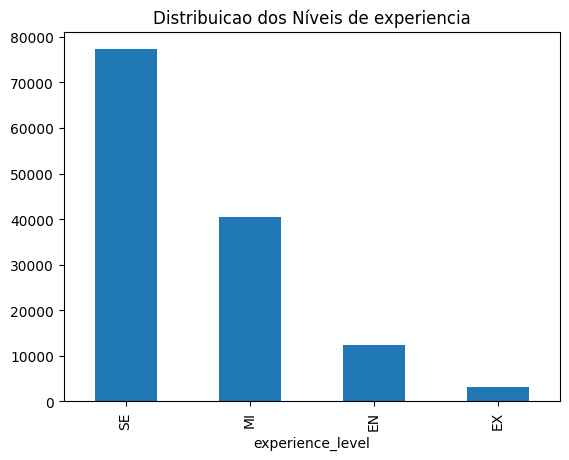

In [12]:
df_limpo["experience_level"].value_counts().plot(kind='bar', title="Distribuicao dos Níveis de experiencia")

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

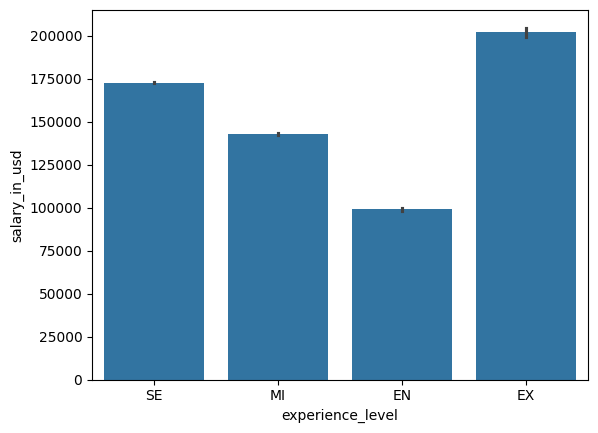

In [13]:
sns.barplot(data=df_limpo, x="experience_level", y="salary_in_usd")

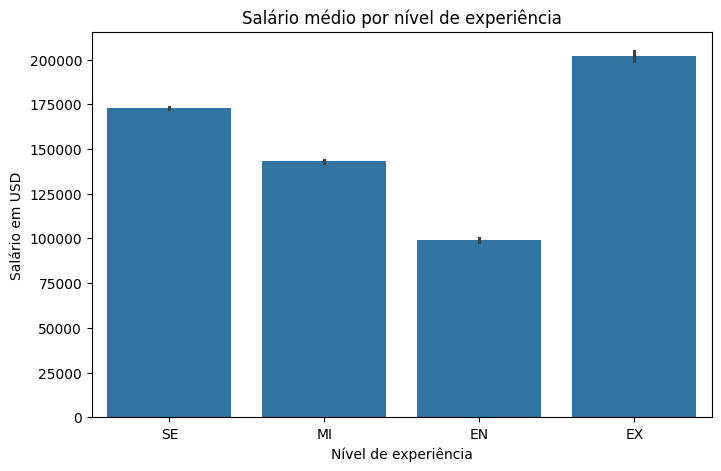

In [14]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x="experience_level", y="salary_in_usd")
plt.title("Salário médio por nível de experiência")
plt.xlabel("Nível de experiência"), plt.ylabel("Salário em USD")
plt.show()


In [15]:
df_limpo.groupby("experience_level")["salary_in_usd"].mean().sort_values(ascending=False)

experience_level
EX    202027.667813
SE    172850.838301
MI    143044.845979
EN     99034.963267
Name: salary_in_usd, dtype: float64

In [16]:
ordem = df_limpo.groupby("experience_level")["salary_in_usd"].mean().sort_values(ascending=False).index
ordem

Index(['EX', 'SE', 'MI', 'EN'], dtype='object', name='experience_level')

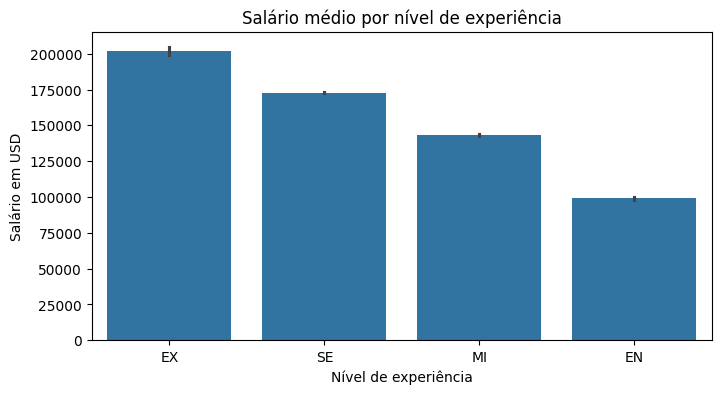

In [17]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df_limpo, x="experience_level", y="salary_in_usd", order=ordem)
plt.title("Salário médio por nível de experiência")
plt.xlabel("Nível de experiência"), plt.ylabel("Salário em USD")
plt.show()

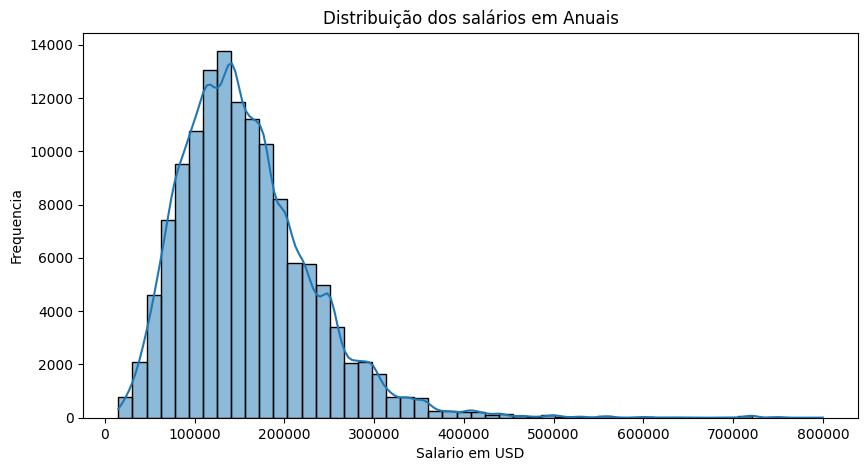

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_limpo, x="salary_in_usd", bins=50, kde=True)
plt.title("Distribuição dos salários em Anuais")
plt.xlabel("Salario em USD"), plt.ylabel("Frequencia")
plt.show()

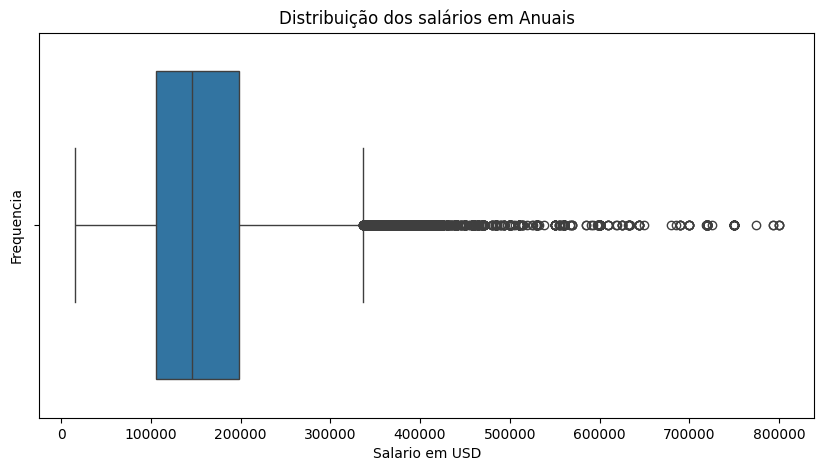

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_limpo["salary_in_usd"])
plt.title("Distribuição dos salários em Anuais")
plt.xlabel("Salario em USD"), plt.ylabel("Frequencia")
plt.show()

C:\Users\eduar\AppData\Local\Temp\ipykernel_39804\709018429.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="experience_level", y="salary_in_usd", data=df_limpo, order=ordem, palette="Set2")


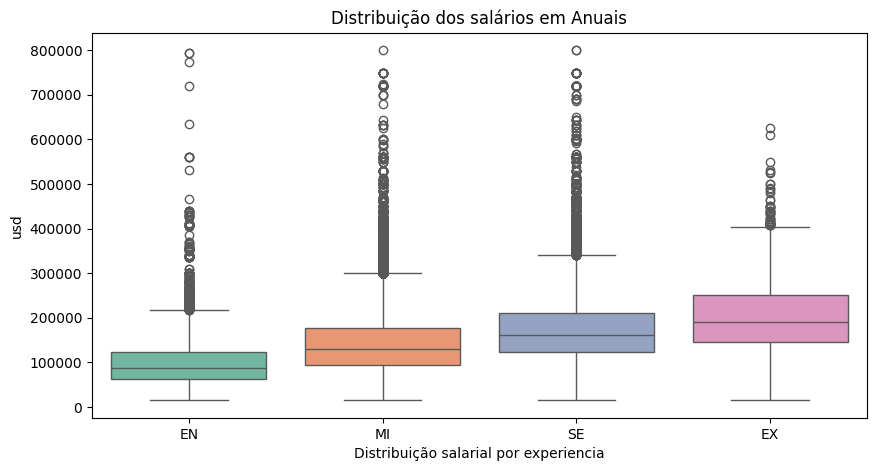

In [20]:
ordem = ["EN", "MI", "SE", "EX"]

plt.figure(figsize=(10,5))
sns.boxplot(x="experience_level", y="salary_in_usd", data=df_limpo, order=ordem, palette="Set2")
plt.title("Distribuição dos salários em Anuais")
plt.xlabel("Distribuição salarial por experiencia"), plt.ylabel("usd")
plt.show()

In [27]:
senioridade_media_salario = df_limpo.groupby("experience_level")["salary_in_usd"].mean().sort_values(ascending=False).reset_index()
fig = px.bar(senioridade_media_salario, x="experience_level", y="salary_in_usd", title="Salário médio por nível de experiência", labels={"experience_level": "Nível de experiência ", "salary_in_usd": "Salário em medio USD "})
fig.show()

In [ ]:
remoto_contagem = df_limpo["company_size"].value_counts().reset_index()
remoto_contagem.columns = ["tipo_trabalho", "quantidade"]

fig = px.pie(remoto_contagem, 
             names="tipo_trabalho", 
             values="quantidade",
             title="Proporçao de tipos de trabalho")
fig.show()